In [194]:
from dolfin import *

# Define mesh

In [195]:
N = 30
#mesh = UnitIntervalMesh(N)
mesh = UnitSquareMesh(N,N)

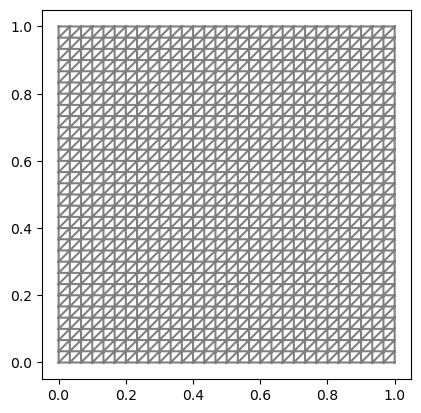

In [196]:
plot(mesh)

# Label subdomains and Interface

In [197]:
class Fluid(SubDomain):
    def inside(self, x, on_boundary):
        return x[0] <= 0.5

class Solid(SubDomain):
    def inside(self, x, on_boundary):
        return x[0] >= 0.5

class Interface(SubDomain):
    def inside(self, x, on_boundary):
        return x[0] == 0.5

fluid = Fluid()
solid = Solid()
interface = Interface()

sub_domains = MeshFunction("size_t", mesh, mesh.topology().dim())
sub_domains.set_all(0)
fluid.mark(sub_domains, 1)
solid.mark(sub_domains, 2)

boundaries = MeshFunction("size_t", mesh, mesh.topology().dim() - 1)
boundaries.set_all(0)
interface.mark(boundaries, 1)

In [198]:
sub_domains.array()
boundaries.array()

array([0, 0, 0, ..., 0, 0, 0], dtype=uint64)

# Define Function Spaces and Weak Variational Form

In [199]:
VE = FiniteElement("CG", mesh.ufl_cell(), 1)
V = FunctionSpace(mesh, MixedElement(VE, VE))
F = FunctionSpace(mesh, VE)
P = FunctionSpace(mesh, "CG", 1)

In [200]:
v = TrialFunction(V)
psi = TestFunction(V)
(w, z) = split(v)
(psiw, psiz) = split(psi)

Define a function $f$ that we want to approximate

In [201]:
fe = Expression("x[0]*x[1]", degree = 1)
f = project(fe, F)

In [202]:
dx = Measure('dx', domain=mesh, subdomain_data=sub_domains)
dS = Measure('dS', domain=mesh, subdomain_data=boundaries)
n = FacetNormal(mesh)

In [203]:
assemble( inner(n("-"), n("+"))*dS(1))

-1.0

In [204]:
with_iota = False #False/True
alpha = 1e-5

In [205]:
iota = interpolate(Constant(1.0), P)
if with_iota: # in this case iota is chosen as constantly one (= no iota)
    bc = DirichletBC(P, Constant(0.0), boundaries, 1)
    bc.apply(iota.vector())

In [206]:
a = inner(grad(w), grad(psiz))*dx(1) - inner(z, psiz)*dx(1) \
+ alpha * inner(grad(z), grad(psiw*iota))*dx(1) + inner(w, psiw)*dx(2) + alpha * inner(grad(z), grad(psiz *iota))*dx(2) \
+ alpha * (- inner(grad(z)("-"), iota("-") * psiw("-")* n("-"))*dS(1) - inner(grad(z)("+"), iota("+")*psiz("+")* n("+"))*dS(1))

In [207]:
L = inner(f, psiw)*dx(2)

In [208]:
v2 = Function(V)

In [209]:
solve(a == L, v2, [])

Solving linear variational problem.


In [210]:
(w2, z2) = split(v2)

Object cannot be plotted directly, projecting to piecewise linears.


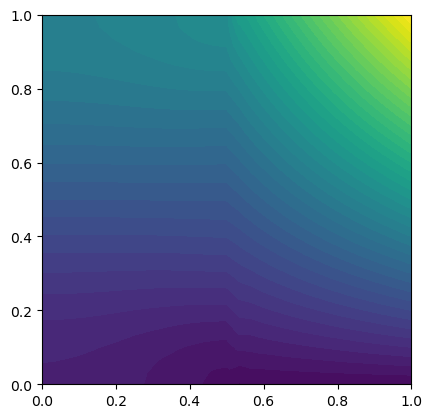

In [211]:
plot(w2)

In [212]:
w3, z3 = v2.split(deepcopy=True)

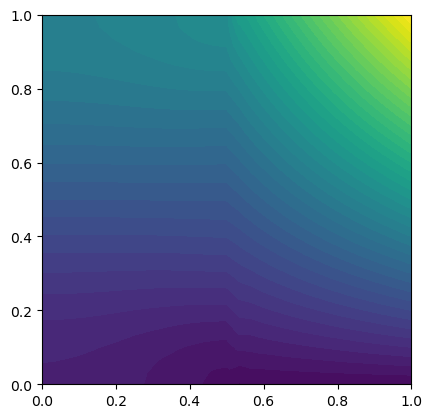

In [213]:
plot(w3)

In [214]:
w3.vector()[:]

array([ 4.19556046e-01,  4.18683136e-01,  4.19957273e-01,  4.15778321e-01,
        4.18994880e-01,  4.20861607e-01,  4.10934346e-01,  4.16056812e-01,
        4.19867341e-01,  4.22305986e-01,  4.04245919e-01,  4.11187938e-01,
        4.16881046e-01,  4.21287110e-01,  4.24291651e-01,  3.95827107e-01,
        4.04473466e-01,  4.11950705e-01,  4.18236061e-01,  4.23243562e-01,
        4.26805958e-01,  3.85811204e-01,  3.96026486e-01,  4.05162720e-01,
        4.13209017e-01,  4.20105891e-01,  4.25720352e-01,  4.29826777e-01,
        3.74346258e-01,  3.85981350e-01,  3.96633596e-01,  4.06299882e-01,
        4.14943950e-01,  4.22469502e-01,  4.28693348e-01,  4.33322076e-01,
        3.61589680e-01,  3.74487575e-01,  3.86502349e-01,  3.97633630e-01,
        4.07863326e-01,  4.17129797e-01,  4.25298205e-01,  4.32128728e-01,
        4.37247127e-01,  3.47703158e-01,  3.61703935e-01,  3.74923333e-01,
        3.87358324e-01,  3.99002376e-01,  4.09822804e-01,  4.19732104e-01,
        4.28553169e-01,  

In [215]:
assemble( inner(w3- f, w3-f)*dx(2))

5.729021573778279e-07

with iota: 2.454632902644894e-07
without iota: 5.729021573778279e-07